In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
dataset = "test-packages"
df = pd.read_csv("input/test-packages.csv")
df_freq = pd.read_csv("results/test-packages_frequency.csv")
df_info = pd.read_csv("results/test-packages_information.csv")
df_entropy = pd.read_csv("results/test-packages_entropy.csv")


In [33]:
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000e+00,34.107.221.82,192.168.0.86,TCP,66,80 > 52072 [ACK] Seq=1 Ack=1 Win=265 Len=0 T...
1,2,2.090000e-07,34.107.221.82,192.168.0.86,TCP,66,80 > 52070 [ACK] Seq=1 Ack=1 Win=265 Len=0 T...
2,3,1.352022e-01,192.168.0.86,52.24.163.249,TCP,66,39504 > 443 [ACK] Seq=1 Ack=1 Win=501 Len=0 ...
3,4,4.350056e-01,52.24.163.249,192.168.0.86,TCP,66,[TCP ACKed unseen segment] 443 > 39504 [ACK]...
4,5,1.511248e+00,192.168.0.86,23.212.49.138,TCP,66,50458 > 80 [ACK] Seq=1 Ack=1 Win=501 Len=0 T...
...,...,...,...,...,...,...,...
39726,39727,1.019583e+03,185.197.26.220,192.168.0.86,UDP,254,50003 > 46699 Len=212
39727,39728,1.019587e+03,192.168.0.86,185.197.26.209,UDP,190,56401 > 50006 Len=148
39728,39729,1.019588e+03,192.168.0.86,185.197.26.209,UDP,155,56401 > 50006 Len=113
39729,39730,1.019588e+03,192.168.0.86,185.197.26.209,UDP,167,56401 > 50006 Len=125


### Apariciones por protocolo

<AxesSubplot:xlabel='Protocol'>

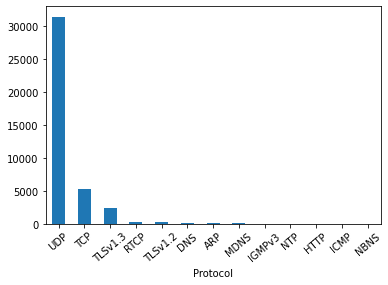

In [34]:
df.value_counts(df.Protocol).plot.bar(rot=40)

<AxesSubplot:xlabel='Protocol'>

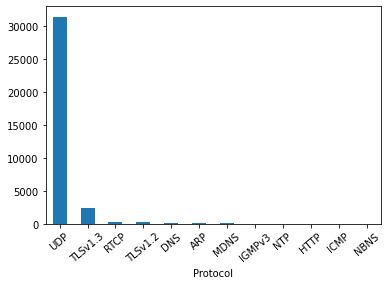

In [35]:
# Remove TCP & QUIC values
df2=df
df2 = df2[df2["Protocol"] != "TCP"]
df2 = df2[df2["Protocol"] != "QUIC"]
df2.value_counts(df.Protocol).plot.bar(rot=40)

### Frecuencia por protocolo

<AxesSubplot:xlabel='Protocol'>

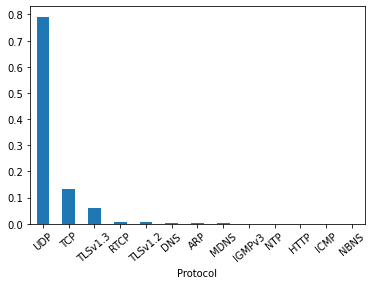

In [36]:

#df["count"] = df.value_counts(df.Protocol)
#df.value_counts(df.Protocol)
df["count"] = df.groupby("Protocol").sum().Length
df.value_counts(df.Protocol, normalize=True).plot.bar(rot=40)


In [37]:
df_entropy[df_entropy["dataset"]==dataset]["value"].item()

0.0129909885862041

# Informacion por protocolo

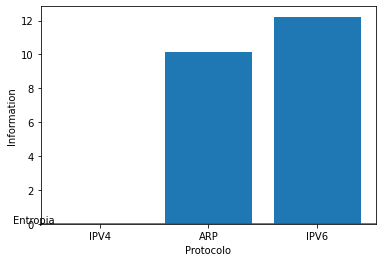

In [38]:
plt.bar(df_info["type"], df_info["value"])
plt.xlabel("Protocolo")
plt.ylabel("Information")
entropy = df_entropy[df_entropy["dataset"]==dataset]["value"].item()
plt.axhline(y=entropy, color='r', linestyle='-')
plt.text(-0.8,entropy,'Entropia')
plt.show()

In [39]:
df_freq

,type,value
0,IPV4,0.998917
1,ARP,0.000874
2,IPV6,0.000208
